In [ ]:
##first we install our required libraries

In [1]:
pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.4 MB/s eta 0:00:00


In [2]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.5 MB/s eta 0:00:00


In [3]:
pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.1-py3-none-any.whl size=190074 sha256=1169e3534a858eb705dd74edfc4987d3abfcbdcd4af12dd4eafb74d81ed2fd32
  Stored in directory: /root/.cache/pip/wheels/a3/42/d7/48a53ffc1466bd63932f28583c64ebf442114db14a0bfa8c95
Successfully built pyod


In [4]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 5.1 MB/s eta 0:00:00


In [5]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap
%matplotlib inline

# sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report

from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer

import lightgbm as lgb
import prince

In [6]:
df = pd.read_csv("survey.csv")

In [7]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
df[:15]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [9]:
def understand_variables(dataset):

    print("Shape = "+str(dataset.shape)+"\n")
    print("Null count :\n\n"+str(dataset.isnull().sum()))

understand_variables(df)

Shape = (1259, 27)

Null count :

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [10]:
value_counts = df['Gender'].value_counts()
value_counts

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [11]:
df.drop('Timestamp', axis=1, inplace=True)
df.drop('comments', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)

In [12]:
# handle NAN DATA
df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.fillna(df.mode().iloc[0])

In [13]:
unique_vals = df['Gender'].unique()
unique_vals


array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [14]:
df['Gender'] = df['Gender'].str.replace(' ', '')



In [15]:
df["Gender"] = df["Gender"].replace({"male": "Male", "female": "Female", "M": "Male",'F':'Female','Woman':'Female','f':'Female','Man':'Male','m':'Male'})

# Print the updated DataFrame


# Remove rows with specific values in the "gender" column
df = df[~df["Gender"].isin(['Male-ish', 'maile', 'Trans-female',
       'Cis Female', 'something kinda male?', 'Mal','CisMale', 'maleleaningandrogynous',
       'ostensiblymale','unsurewhatthatreallymeans',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer',
       'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^'
      , 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man', 'Guy(-ish)^_^','CisFemale', 'somethingkindamale?','Transwoman', 'Female(trans)','Female(cis)', 'cismale','Male(CIS)', 'Alittleaboutyou', 'CisMan','ostensiblymale,unsurewhatthatreallymeans'])]




In [16]:
unique_vals = df['Gender'].unique()
unique_vals


array(['Female', 'Male'], dtype=object)

In [17]:
df[:7]

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,No,Yes,No,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,No,Yes,Yes,Sometimes,1-5,Yes,Yes,No,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_transformer_onehot = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
    ])

categorical_transformer_ordinal = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder())
    ])

num = Pipeline(
    steps=[
        ("encoder", PowerTransformer())
    ])


In [19]:
preprocessor  = ColumnTransformer(transformers = [
                                        ('cat_onehot', categorical_transformer_onehot, [ 'Gender',  'self_employed', 'family_history', 'treatment', 'work_interfere',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']),  ('cat_ordinal', categorical_transformer_ordinal, ["no_employees"]),

                                        ('num', num, ["Age"])
                                        ])

In [20]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
    )
pipe_fit = pipeline.fit(df)

data = pd.DataFrame(pipe_fit.transform(df), columns = pipe_fit.get_feature_names_out().tolist())

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [21]:
data[:7]

,cat_onehot__Gender_Male,cat_onehot__self_employed_Yes,cat_onehot__family_history_Yes,cat_onehot__treatment_Yes,cat_onehot__work_interfere_Often,cat_onehot__work_interfere_Rarely,cat_onehot__work_interfere_Sometimes,cat_onehot__remote_work_Yes,cat_onehot__tech_company_Yes,cat_onehot__benefits_No,...,cat_onehot__supervisor_Yes,cat_onehot__mental_health_interview_No,cat_onehot__mental_health_interview_Yes,cat_onehot__phys_health_interview_No,cat_onehot__phys_health_interview_Yes,cat_onehot__mental_vs_physical_No,cat_onehot__mental_vs_physical_Yes,cat_onehot__obs_consequence_Yes,cat_ordinal__no_employees,num__Age
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.300317
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.774677
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,-0.026226
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,-0.090192
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.090192
5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.038201
6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.168396


In [22]:
from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(data)
outliers = clf.predict(data)

data["outliers"] = outliers
df["outliers"] = outliers

# Data without outliers
data_no_outliers = data[data["outliers"] == 0]
data_no_outliers = data_no_outliers.drop(["outliers"], axis = 1)

# Data with Outliers
data_with_outliers = data.copy()
data_with_outliers = data_with_outliers.drop(["outliers"], axis = 1)

# Original Data without Outliers
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)

In [23]:


print(data_no_outliers.shape)
print(data_with_outliers.shape)
print(df_no_outliers.shape)



(1095, 40)
(1217, 40)
(1095, 23)


In [24]:
df_no_outliers.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

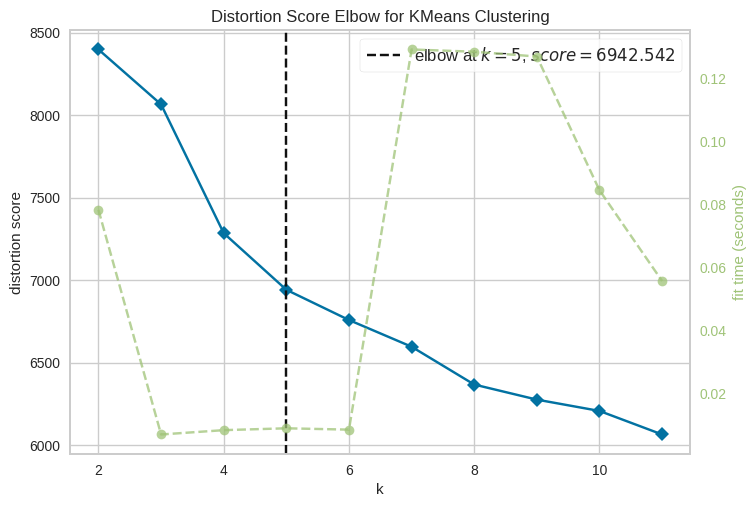

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:

# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,12))

visualizer.fit(data_no_outliers)        # Fit the data to the visualizer
visualizer.show()


In [26]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=42)
clusters_predict = km.fit_predict(data_no_outliers)
print(km.inertia_)

6942.417414323832


In [27]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(data_no_outliers,clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(data_no_outliers,clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(data_no_outliers,clusters_predict)}")

Davies bouldin score: 2.2824086067282527
Calinski Score: 158.20397686116
Silhouette Score: 0.09065486187922647


In [28]:
def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()

    fig = px.scatter_3d(df,
                        x=columns[0],
                        y=columns[1],
                        z=columns[2],
                        color='cluster',
                        template="plotly",

                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 4,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 1000,
                                height = 800,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df,
                        x=columns[0],
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800,
                                height = 700,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()

In [29]:
pca_3d_object, df_pca_3d = get_pca_3d(data_no_outliers, clusters_predict)

plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)

The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              3.968         9.92%                      9.92%
1              3.421         8.55%                     18.47%
2              2.277         5.69%                     24.16%


In [30]:
pca_2d_object, df_pca_2d = get_pca_2d(data_no_outliers, clusters_predict)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

In [31]:
from sklearn.manifold import TSNE

# Sample a smaller portion of your data
sampling_data = data_no_outliers.sample(frac=0.1, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict).sample(frac=0.1, random_state=1)[0].values

# Perform t-SNE with adjusted parameters
df_tsne_3d = TSNE(
    n_components=3,
    learning_rate=200,  # Adjust the learning rate
    perplexity=30,      # Adjust the perplexity
    n_iter=1000         # Adjust the number of iterations
).fit_transform(sampling_data)

# Create a DataFrame and plot
df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2", "comp3"])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, title="T-SNE Space", opacity=1, width_line=0.1)

In [32]:
data_no_outliers.shape

(1095, 40)

In [33]:
sampling_data

,cat_onehot__Gender_Male,cat_onehot__self_employed_Yes,cat_onehot__family_history_Yes,cat_onehot__treatment_Yes,cat_onehot__work_interfere_Often,cat_onehot__work_interfere_Rarely,cat_onehot__work_interfere_Sometimes,cat_onehot__remote_work_Yes,cat_onehot__tech_company_Yes,cat_onehot__benefits_No,...,cat_onehot__supervisor_Yes,cat_onehot__mental_health_interview_No,cat_onehot__mental_health_interview_Yes,cat_onehot__phys_health_interview_No,cat_onehot__phys_health_interview_Yes,cat_onehot__mental_vs_physical_No,cat_onehot__mental_vs_physical_Yes,cat_onehot__obs_consequence_Yes,cat_ordinal__no_employees,num__Age
1081,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.103078
473,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,-0.341218
1145,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,-0.279212
740,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,-0.341218
960,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.433894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.195571
150,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,-0.341218
10,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,-0.090192
218,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.026226


In [34]:
df_tsne_2d = TSNE(
                  n_components=2,
                  learning_rate=500,
                  init='random',
                  perplexity=30,
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=["comp1", "comp2"])
df_tsne_2d["cluster"] = sampling_clusters

plot_pca_2d(df_tsne_2d, title = "T_SNE Space", opacity=1, width_line = 0.5)

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 39
[LightGBM] [Info] Start training from score -1.547471
[LightGBM] [Info] Start training from score -0.948776
[LightGBM] [Info] Start training from score -6.998510
[LightGBM] [Info] Start training from score -1.304778
[LightGBM] [Info] Start training from score -2.056867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

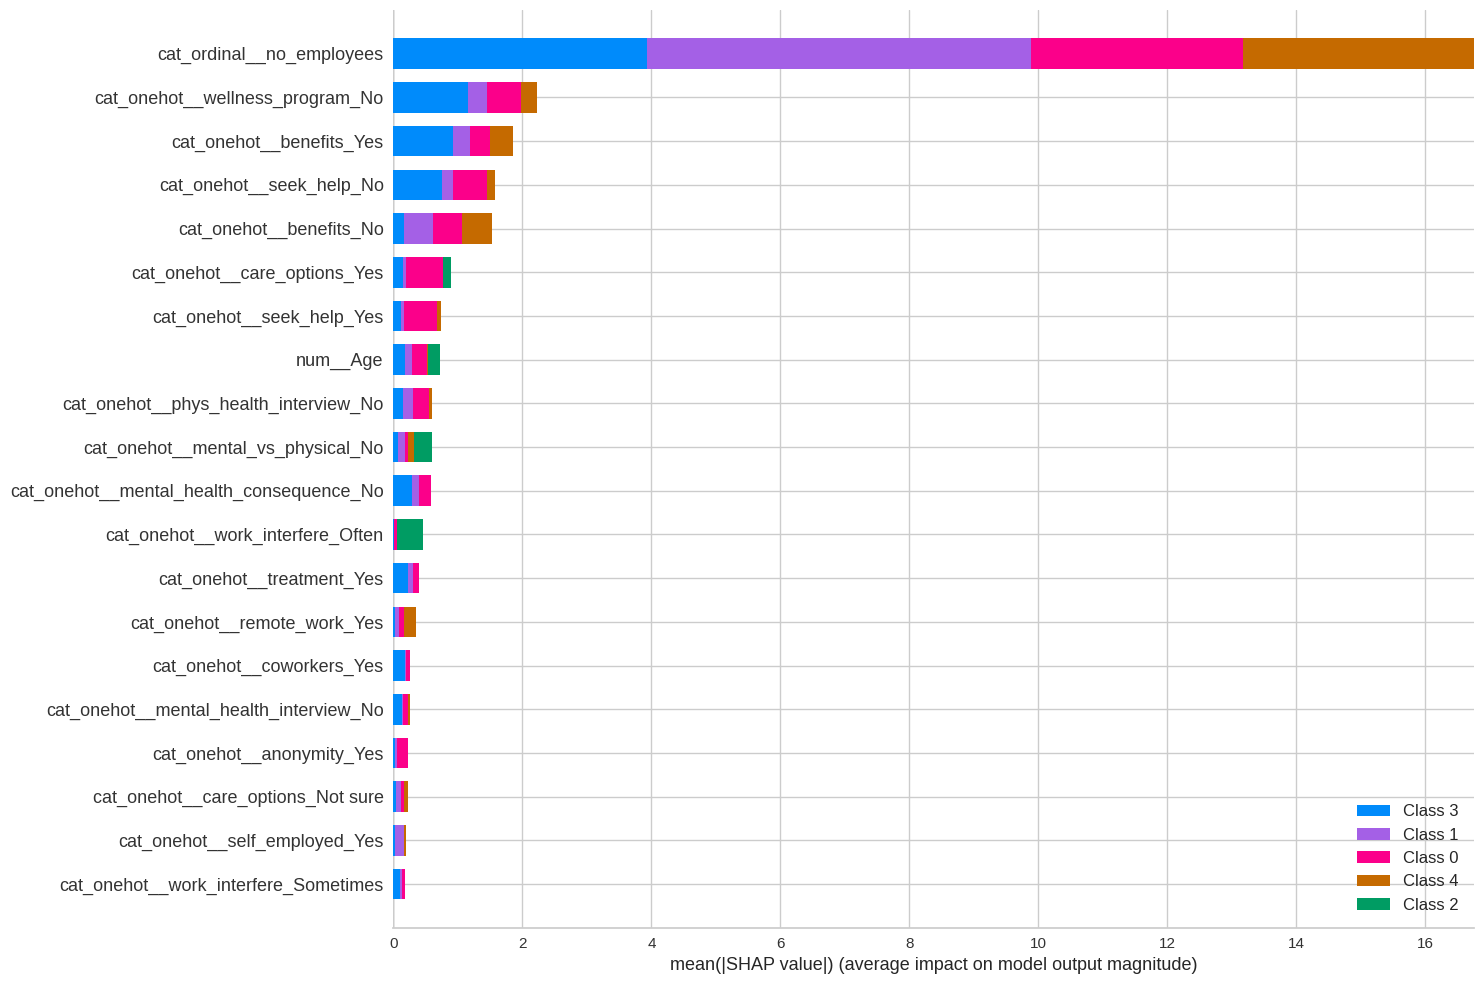

In [35]:
import lightgbm as lgb
import shap

# We create the LGBMClassifier model and train it
clf_km = lgb.LGBMClassifier(colsample_by_tree=0.8)
clf_km.fit(X=data_no_outliers, y=clusters_predict)

#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(data_no_outliers)
shap.summary_plot(shap_values_km, data_no_outliers, plot_type="bar", plot_size=(15, 10))

In [36]:
df_no_outliers = df[df.outliers == 0]
df_no_outliers["cluster"] = clusters_predict

df_no_outliers.groupby('cluster').agg(
    {
        'Gender': lambda x: x.value_counts().index[0],
        'self_employed': lambda x: x.value_counts().index[0],
        'family_history': lambda x: x.value_counts().index[0],
        'treatment': lambda x: x.value_counts().index[0],
        'work_interfere': lambda x: x.value_counts().index[0],
        'no_employees': lambda x: x.value_counts().index[0],
        'remote_work': lambda x: x.value_counts().index[0],
        'tech_company': lambda x: x.value_counts().index[0],
        'care_options': lambda x: x.value_counts().index[0],
        'wellness_program': lambda x: x.value_counts().index[0],
        'seek_help': lambda x: x.value_counts().index[0],
        'anonymity': lambda x: x.value_counts().index[0],
        'leave': lambda x: x.value_counts().index[0],
        'mental_health_consequence': lambda x: x.value_counts().index[0],
        'phys_health_consequence': lambda x: x.value_counts().index[0],
        'coworkers': lambda x: x.value_counts().index[0],
        'mental_health_interview': lambda x: x.value_counts().index[0],
        'phys_health_interview': lambda x: x.value_counts().index[0],
        'mental_vs_physical': lambda x: x.value_counts().index[0],
        'obs_consequence': lambda x: x.value_counts().index[0],
        # 'contact': lambda x: x.value_counts().index[0],
        'Age':'mean'



    }
).sort_values("Age").reset_index()

<ipython-input-36-ee135e6dac44>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,1,Male,No,No,Yes,Sometimes,26-100,No,Yes,No,...,Don't know,Don't know,No,No,Some of them,No,Maybe,Don't know,No,27.254717
1,3,Male,No,No,No,Sometimes,6-25,No,Yes,No,...,Don't know,Don't know,No,No,Some of them,No,Maybe,Don't know,No,30.764310
2,4,Male,No,No,No,Sometimes,1-5,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,No,Maybe,Don't know,No,31.978571
3,0,Male,No,No,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Don't know,No,33.236052
4,2,Male,No,No,Yes,Often,6-25,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,329.000000


#LLM+kmeans

In [37]:
df = pd.read_csv("survey.csv")
df.drop('Timestamp', axis=1, inplace=True)
df.drop('comments', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.fillna(df.mode().iloc[0])

In [38]:
df['Gender'] = df['Gender'].str.replace(' ', '')
df["Gender"] = df["Gender"].replace({"male": "Male", "female": "Female", "M": "Male",'F':'Female','Woman':'Female','f':'Female','Man':'Male','m':'Male'})

# Print the updated DataFrame


# Remove rows with specific values in the "gender" column
df = df[~df["Gender"].isin(['Male-ish', 'maile', 'Trans-female',
       'Cis Female', 'something kinda male?', 'Mal','CisMale', 'maleleaningandrogynous',
       'ostensiblymale','unsurewhatthatreallymeans',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer',
       'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^'
      , 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man', 'Guy(-ish)^_^','CisFemale', 'somethingkindamale?','Transwoman', 'Female(trans)','Female(cis)', 'cismale','Male(CIS)', 'Alittleaboutyou', 'CisMan','ostensiblymale,unsurewhatthatreallymeans'])]





In [39]:
unique_vals = df['Gender'].unique()
unique_vals


array(['Female', 'Male'], dtype=object)

In [40]:
df[10:15]

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
10,31,Male,No,No,Yes,Sometimes,6-25,Yes,Yes,Don't know,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
11,29,Male,No,No,No,Never,100-500,Yes,Yes,Don't know,...,Don't know,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No
12,42,Female,No,Yes,Yes,Sometimes,26-100,No,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes
13,36,Male,No,Yes,No,Never,500-1000,No,Yes,Don't know,...,Don't know,Don't know,No,No,Yes,Yes,No,No,Don't know,No
14,27,Male,No,No,No,Never,6-25,No,Yes,Don't know,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,Maybe,Yes,Yes,No


In [41]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=211e12e5c8e7e5f2fd53ef800d383e6016c19d3a40bcd8d4a1c336e6e48858c2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [42]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from sentence_transformers import SentenceTransformer

In [43]:
def compile_text(x):

    text =  f"""Age: {x['Age']},
                Gender: {x['Gender']},
                self_employed: {x['self_employed']},
                family_history: {x['family_history']},
                treatment: {x['treatment']},
                work_interfere: {x['work_interfere']},
                no_employees: {x['no_employees']},
                remote_work: {x['remote_work']},
                tech_company: {x['tech_company']},
                care_options: {x['care_options']},
                wellness_program: {x['wellness_program']},
                seek_help: {x['seek_help']},
                anonymity: {x['anonymity']},
                leave: {x['leave']},
                mental_health_consequence: {x['mental_health_consequence']},
                phys_health_consequence: {x['phys_health_consequence']},
                coworkers: {x['coworkers']},
                supervisor: {x['supervisor']},
                mental_health_interview: {x['mental_health_interview']},
                phys_health_interview: {x['phys_health_interview']},
                mental_vs_physical: {x['mental_vs_physical']},
                obs_consequence: {x['obs_consequence']}

            """

    return text

sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()

In [44]:
model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")
output = model.encode(sentences=sentences,
         show_progress_bar=True,
         normalize_embeddings=True)

df_embedding = pd.DataFrame(output)
df_embedding

Batches:   0%|          | 0/39 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.079625,-0.023495,0.066818,0.018729,-0.028906,-0.049743,0.032629,-0.023688,0.001464,-0.016387,...,-0.004453,0.061878,0.067754,-0.046038,-0.057025,-0.006404,0.105908,-0.033009,0.016879,0.024217
1,0.082629,0.009049,0.046524,0.008511,-0.019181,-0.024347,0.039191,-0.012057,0.007341,-0.011593,...,-0.010959,0.041756,0.052877,-0.022011,-0.059269,-0.039621,0.117920,-0.053708,0.016643,0.031924
2,0.073744,-0.015354,0.051744,0.006846,-0.021150,-0.037689,0.026880,-0.022838,-0.001014,-0.000134,...,0.007381,0.054932,0.067617,-0.045065,-0.055069,-0.011013,0.122186,-0.030063,0.021459,0.035014
3,0.077248,-0.025713,0.065778,0.010280,-0.028258,-0.049145,0.034246,-0.017947,-0.001020,-0.013028,...,0.013524,0.052587,0.065485,-0.046213,-0.065527,-0.013805,0.118754,-0.019659,0.015916,0.029546
4,0.078047,-0.010196,0.039674,0.007363,-0.034996,-0.026022,0.048310,-0.013255,0.010408,-0.018567,...,-0.004878,0.042752,0.066617,-0.037139,-0.070187,-0.025602,0.112764,-0.048499,0.013160,0.031412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.087934,-0.004179,0.049400,0.017704,-0.034532,-0.054378,0.048976,-0.026396,-0.011668,-0.011386,...,-0.003147,0.045224,0.062537,-0.029615,-0.060232,-0.032226,0.105095,-0.039820,0.007566,0.027614
1213,0.085787,-0.013418,0.065722,0.014475,-0.031049,-0.048791,0.030498,-0.025070,0.003628,-0.009684,...,0.005355,0.056224,0.066601,-0.044980,-0.061143,-0.011053,0.125988,-0.032402,0.020079,0.030699
1214,0.078619,-0.007797,0.060661,0.012345,-0.032177,-0.048569,0.020136,-0.027551,0.003906,-0.008165,...,0.002592,0.040665,0.068344,-0.036904,-0.050400,-0.009108,0.130622,-0.047557,0.025165,0.033691
1215,0.080853,-0.016831,0.068214,0.018523,-0.033137,-0.038160,0.031416,-0.024355,0.009931,-0.007719,...,0.001545,0.053877,0.063440,-0.036490,-0.047858,-0.005753,0.112498,-0.042579,0.008959,0.030649


In [45]:
from pyod.models.ecod import ECOD
# https://github.com/yzhao062/pyod

clf = ECOD()
clf.fit(df_embedding)


out = clf.predict(df_embedding)
df_embedding["outliers"] = out
df["outliers"] = out

df_embedding_no_out = df_embedding[df_embedding["outliers"] == 0]
df_embedding_no_out = df_embedding_no_out.drop(["outliers"], axis = 1)


df_embedding_with_out = df_embedding.copy()
df_embedding_with_out = df_embedding_with_out.drop(["outliers"], axis = 1)

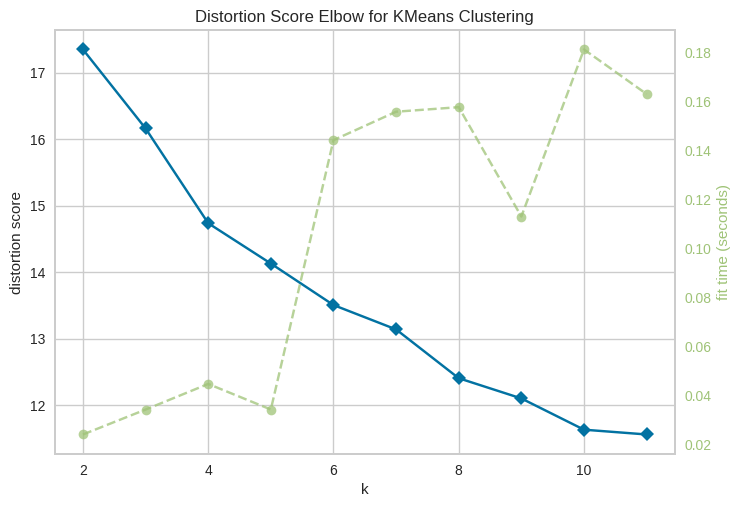

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,12), locate_elbow=False)

visualizer.fit(df_embedding_no_out)        # Fit the data to the visualizer
visualizer.show()

In [47]:


clusters = KMeans(n_clusters=5, init = "k-means++").fit(df_embedding_no_out)
print(clusters.inertia_)
clusters_predict2 = clusters.predict(df_embedding_no_out)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



14.03125


In [48]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(df_embedding_no_out,clusters_predict2)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(df_embedding_no_out,clusters_predict2)}")


"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, but can also be used as a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(df_embedding_no_out,clusters_predict2)}")

Davies bouldin score: 2.2040299711294375
Calinski Score: 213.86255057232822
Silhouette Score: 0.12598542869091034


In [49]:


pca_3d_object, df_pca_3d = get_pca_3d(df_embedding_no_out, clusters_predict2)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)



The variability is :           eigenvalue % of variance % of variance (cumulative)
component                                                    
0            103.581        26.97%                     26.97%
1             54.250        14.13%                     41.10%
2             36.436         9.49%                     50.59%


In [50]:


pca_2d_object, df_pca_2d = get_pca_2d(df_embedding_no_out, clusters_predict2)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.2)



In [51]:
sampling_data = df_embedding_no_out.sample(frac=0.1, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict2).sample(frac=0.1, replace=True, random_state=1)[0].values

df_tsne_3d = TSNE(
                  n_components=3,
                  learning_rate=500,
                  init='random',
                  perplexity=30,
                  n_iter = 1000).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, title = "T-SNE Space", opacity=1, width_line = 0.1)



In [52]:


df_tsne_2d = TSNE(
                  n_components=2,
                  learning_rate=500,
                  init='random',
                  perplexity=30,
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=["comp1", "comp2"])
df_tsne_2d["cluster"] = sampling_clusters

plot_pca_2d(df_tsne_2d, title = "PCA Space", opacity=0.8, width_line = 0.5)



In [53]:


df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop("outliers", axis = 1)



In [55]:
df_no_outliers = df[df.outliers == 0]
df_no_outliers["cluster"] = clusters_predict2

df_no_outliers.groupby('cluster').agg(
    {
        'Gender': lambda x: x.value_counts().index[0],
        'self_employed': lambda x: x.value_counts().index[0],
        'family_history': lambda x: x.value_counts().index[0],
        'treatment': lambda x: x.value_counts().index[0],
        'work_interfere': lambda x: x.value_counts().index[0],
        'no_employees': lambda x: x.value_counts().index[0],
        'remote_work': lambda x: x.value_counts().index[0],
        'tech_company': lambda x: x.value_counts().index[0],
        'care_options': lambda x: x.value_counts().index[0],
        'wellness_program': lambda x: x.value_counts().index[0],
        'seek_help': lambda x: x.value_counts().index[0],
        'anonymity': lambda x: x.value_counts().index[0],
        'leave': lambda x: x.value_counts().index[0],
        'mental_health_consequence': lambda x: x.value_counts().index[0],
        'phys_health_consequence': lambda x: x.value_counts().index[0],
        'coworkers': lambda x: x.value_counts().index[0],
        'mental_health_interview': lambda x: x.value_counts().index[0],
        'phys_health_interview': lambda x: x.value_counts().index[0],
        'mental_vs_physical': lambda x: x.value_counts().index[0],
        'obs_consequence': lambda x: x.value_counts().index[0],
        # 'contact': lambda x: x.value_counts().index[0],
        'Age':'mean'



    }
).sort_values("Age").reset_index()

<ipython-input-55-d33b659d8771>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,2,Male,No,No,No,Sometimes,6-25,No,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,Don't know,No,24.474708
1,3,Male,No,No,No,Sometimes,6-25,No,Yes,No,...,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Don't know,No,30.910615
2,1,Male,No,No,No,Sometimes,More than 1000,No,Yes,Not sure,...,Don't know,Don't know,No,No,Some of them,No,Maybe,Don't know,No,31.216216
3,4,Male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,No,Maybe,Yes,No,33.181250
4,0,Male,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Don't know,No,35.227273
